In [1]:
import glob
import os
import sys
import platform
import requests
import batanalysis as ba
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time, TimeDelta
from astropy.io import fits
from pathlib import Path
import swiftbat.swutil as sbu
import swiftbat
plt.ion()

ba.datadir("/home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A")



PosixPath('/home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A')

In [2]:
# incat=ba.create_custom_catalog('GRB080319B', 217.919, 36.300, 62.54, 66.88)
# incat=Path("./custom_catalog.cat")


In [3]:
object_name = "GRB130427A"
object_location = swiftbat.simbadlocation(object_name)
object_batsource = swiftbat.source(
    ra=object_location[0], dec=object_location[1], name=object_name
)
print(object_location)

(173.13683333333333, 27.698944444444443)


In [4]:
#automating the grb name format using astropy
## CONVERTING THE GRB NAME TO A MONTH-YEAR-DAY FORMAT
from astropy.time import Time

def grb_date(grb_name):
    year = "20" + grb_name[3:5]  # converting the grb name to years
    month = grb_name[5:7] # converting the name to months via indexing
    day = grb_name[7:9]  # converting it to days 

    date_format = f"{year}-{month}-{day}" # setting up the string format
    time = Time(date_format, format='iso') # using the Astropy Time object and passing the date string into it
    return time
    
grb_name = "GRB080319B"
grb_time = grb_date(grb_name) # storing the result of time format from above function
last_day = grb_time + 7 # adding a week to the above time 
print(f"{str(grb_time)} .. {str(last_day)}")

2013-04-27 00:00:00.000 .. 2013-05-04 00:00:00.000


In [5]:
query_args = dict(Start_Time=str(grb_date(grb_name)), fields='All', resultmax=0)
table_everything = ba.from_heasarc(**query_args)
minexposure = 1000     # cm^2 after cos adjust
source_name="GRB080319B"
object_name='GRB080319B'
object_batsource = swiftbat.source(ra=object_location[0], dec=object_location[1], name=object_name)

#calculate the exposure with partial coding
exposures = np.array([object_batsource.exposure(ra=row['RA'], dec=row['DEC'], roll=row['ROLL_ANGLE'])[0] for row in table_everything])

#select the observations that have greater than the minimum desired exposure
table_exposed = table_everything[exposures > minexposure]
print(f"Finding everything finds {len(table_everything)} observations, of which {len(table_exposed)} have more than {minexposure:0} cm^2 coded")

print(np.sort(table_exposed["START_TIME"]))

Finding everything finds 83 observations, of which 22 have more than 1000 cm^2 coded
   START_TIME   
      mjd       
----------------
 56408.586099537
 56409.736099537
 56409.936099537
 56409.990787037
56408.0479050926
56408.1152662037
56408.1291550926
56408.1874884259
56408.1958217593
56408.3242939815
56408.5194328704
56408.9881828704
56409.0479050926
56409.0596990741
56409.1965046296
56409.2562384259
56409.3139467593
56409.5858333333
56409.7263773148
56409.7395717593
56409.8659606481
56409.9992939815


In [6]:
#get a list of the fully downloaded observation IDs
result = ba.download_swiftdata(table_exposed)

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: SWIFT_TLE_ARCHIVE.txt.17313.06346494.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620002pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620002pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620002pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620002ppr.par.gz exists and not ov

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620003pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620003pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620003pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620003ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620003s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739009pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739009pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739009pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739009ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739009s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083uat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083bdecb.hk.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083bdp.hk.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083ben.hk.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083bgocb.hk.gz exists and not overwritten (set c

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: SWIFT_TLE_ARCHIVE.txt.18018.44601275.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620000pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620000pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620000pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620000ppr.par.gz exists and not ov

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620001pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620001pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620001pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620001ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620001s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739010pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097ppr.par.gz exists and not overwritten (set 

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033bmt00024620_rw.lc.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033brt1s.lc.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033brtmc.lc.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035017126pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035017126pjb.par.gz exists and not overwr

In [7]:
final_obs_ids = [i for i in table_exposed['OBSID'] if result[i]['success']]
print(len(final_obs_ids))

22


In [8]:
from astropy.coordinates import SkyCoord
object_name="GRB130427A"
object_location = swiftbat.simbadlocation(object_name)
c=SkyCoord(ra=object_location[0], dec=object_location[1], unit="deg", frame="icrs")
incat=ba.create_custom_catalog(object_name, c.ra.value, c.dec.value, c.galactic.l.value, c.galactic.b.value, catalog_dir=ba.datadir())
# incat=ba.create_custom_catalog(object_name, 217.919, 36.300, 62.54, 66.88)
dir_path = "/home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/"
incat = Path(f"{ba.datadir(dir_path)}/custom_catalog.cat")
print(incat)

/home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/custom_catalog.cat


In [ ]:
#run batsurvey in parallel
input_dict=dict(cleansnr=6,cleanexpr='ALWAYS_CLEAN==T', incatalog=f"{incat}", detthresh=9000, detthresh2=9000)
noise_map_dir = Path("/home/idies/workspace/Temporary/tmpataki/scratch/PATTERN_MAPS/")
batsurvey_obs=ba.parallel.batsurvey_analysis(final_obs_ids,  input_dict=input_dict, patt_noise_dir=noise_map_dir,  nprocs=10, recalc=True)
# batsurvey_obs=ba.parallel.batsurvey_analysis(final_obs_ids,  input_dict=input_dict)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [10]:
# batsurvey_obs=ba.parallel.batsurvey_analysis(final_obs_ids,  input_dict=input_dict, patt_noise_dir=map_dir)

In [11]:
# batsurvey_obs=ba.parallel.batspectrum_analysis(batsurvey_obs, object_name, fit_iterations=1000)

batsurvey_obs = ba.parallel.batspectrum_analysis(
    batsurvey_obs, object_name, use_cstat=False, ul_pl_index=2, nprocs=6
)

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/bat_survey.py:1019: UserWarning: Observation ID: 00554620000 Pointing ID: 20131170735 
There is no source GRB130427A found in the catalog file. Please double check the spelling.
This source may also not be detected in this observation ID/pointing ID
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160249.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -6.986e-04 +/- 4.432e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 900 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160249.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161406.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.015e-04 +/- 4.590e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 797 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161406.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared           

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161049.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.342e-04 +/- 3.442e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1059 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161049.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

*** Parameter 1 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
*** Parameter 2 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: -100
     3            0     -9.00344    (9.48949,0.486044)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: -3, with delta statistic: 1.75163


*** Parameter lower bound is INVALID.


***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 10, with delta statistic: 1.54562


*** Parameter upper bound is INVALID.

     4            0            0    (-2.19077,-2.19077)
*** Parameter 5 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
*** Parameter 1 is not a variable mode

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160249_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.364e-03 +/- 6.797e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 900 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160249_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   96.89     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161406_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.005e-03 +/- 7.403e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 797 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161406_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  199.86     using 8 bins.

Test statistic : Chi-Squared                  199.86     using 8 bins.
 Null hypothesis probability of 2.03e-40 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   15.78     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  199.86     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161049_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.532e-03 +/- 5.591e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1059 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161049_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  222.62     using 8 bins.

Test statistic : Chi-Squared                  222.62     using 8 bins.
 Null hypothesis probability of 2.88e-45 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   25.64     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  222.62     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131180004.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.600e-04 +/- 2.192e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 242 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131180004.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared           

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131180145.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -2.383e-03 +/- 2.586e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 177 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131180145.rsp for Source 1


Fit statistic  : Chi-Squared                    9.29     using 8 bins.

Test statistic : Chi-Squared                    9.29     using 8 bins.
 Null hypothesis probability of 1.58e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170003.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.683e-03 +/- 1.503e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 222 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170003.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131180004_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.866e-02 +/- 3.370e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 242 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131180004_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  144.09     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170003_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.060e-02 +/- 2.374e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 222 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170003_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   91.18     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160320.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -4.549e-03 +/- 2.115e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 186 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131160320.rsp for Source 1


Fit statistic  : C-Statistic                    1.77     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   28.56     using 8 bins.
 Null hypothesis probability of 1.74e-04 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170143.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.013e-03 +/- 2.029e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 187 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170143.rsp for Source 1


Fit statistic  : C-Statistic                    0.84     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                    3.83     using 8 bins.
 Null hypothesis probability of 7.99e-01 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs    

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131180145_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.546e-02 +/- 4.169e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 177 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131180145_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    4.47     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   50.45     using 8 bins.
 Null hypothesis probability of 1.18e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    4.47     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160320_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.855e-02 +/- 3.395e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 186 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160320_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  107.48     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170143_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.290e-02 +/- 2.665e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 187 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170143_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  192.18     using 8 bins.

Test statistic : Chi-Squared                  192.18     using 8 bins.
 Null hypothesis probability of 8.75e-39 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   14.89     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  192.18     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170112.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.899e-03 +/- 1.477e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 896 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170112.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared           

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170247.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.732e-03 +/- 1.294e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1336 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170247.rsp for Source 1


Fit statistic  : Chi-Squared                   15.83     using 8 bins.

Test statistic : Chi-Squared                   15.83     using 8 bins.
 Null hypothesis probability of 1.47e-02 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   po

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170424.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -5.495e-04 +/- 1.299e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1155 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170424.rsp for Source 1


Fit statistic  : Chi-Squared                    4.40     using 8 bins.

Test statistic : Chi-Squared                    4.40     using 8 bins.
 Null hypothesis probability of 6.23e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   po

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170601.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.019e-03 +/- 2.013e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 513 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170601.rsp for Source 1


Fit statistic  : Chi-Squared                    8.03     using 8 bins.

Test statistic : Chi-Squared                    8.03     using 8 bins.
 Null hypothesis probability of 2.36e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170112_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.019e-02 +/- 2.515e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 896 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170112_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  189.29     using 8 bins.

Test statistic : Chi-Squared                  189.29     using 8 bins.
 Null hypothesis probability of 3.61e-38 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   76.96     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  189.29     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170247_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.690e-02 +/- 2.117e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1336 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170247_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                   10.92     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   48.40     using 8 bins.
 Null hypothesis probability of 2.97e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   10.92     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170424_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.669e-02 +/- 2.033e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1155 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170424_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    8.99     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   39.16     using 8 bins.
 Null hypothesis probability of 1.82e-06 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    8.99     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170601_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.596e-02 +/- 3.209e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 513 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170601_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    8.37     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   58.94     using 8 bins.
 Null hypothesis probability of 2.46e-10 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    8.37     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

In [12]:
ba.print_parameters(batsurvey_obs, object_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'index'], latex_table=False, savetable=True, save_file="output.txt")

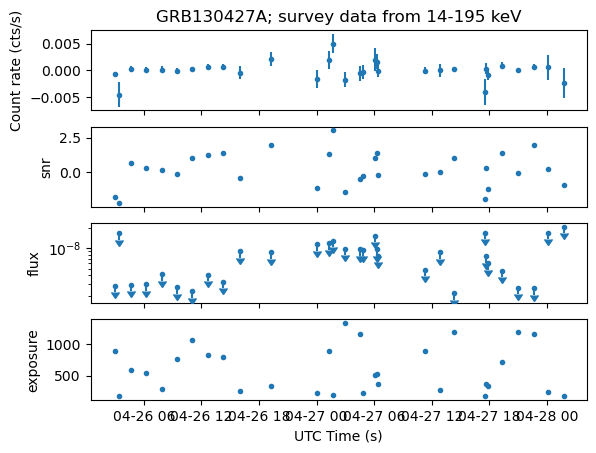

In [13]:
# fig, axes=ba.plot_survey_lc(batsurvey_obs, id_list=source_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"], T0=306757, calc_lc=True) #T0 is GBM trigger time

fig, axes=ba.plot_survey_lc(batsurvey_obs, id_list=object_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"]) #T0 is GBM trigger time

axes[1].set_yscale('log')
axes[0].set_yscale('log')


axes[1].axhline(5,0,1)

fig.savefig('grb130427A_lightcurve.pdf')

In [ ]:
#combine all the pointings into a single file to sort into binned fits files
outventory_file=ba.merge_outventory(batsurvey_obs)

In [ ]:
#bin into 1 day cadence
time_bins=ba.group_outventory(outventory_file, np.timedelta64(1, "D"), end_datetime=Time("2008-03-21"))

In [ ]:
#do the parallel construction of each mosaic for each time bin
time_bins=ba.group_outventory(outventory_file, np.timedelta64(1, "D"), end_datetime=Time("2008-03-21"))
mosaic_list, total_mosaic=ba.parallel.batmosaic_analysis(batsurvey_obs, outventory_file, time_bins, catalog_file=incat, nprocs=1)

In [ ]:
mosaic_list=ba.parallel.batspectrum_analysis(mosaic_list, source_name, fit_iterations=1000, nprocs=1)
total_mosaic =ba.parallel.batspectrum_analysis(total_mosaic, source_name, fit_iterations=1000, nprocs=1)

In [ ]:
fig, axes=ba.plot_survey_lc(mosaic_list, id_list=source_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"], T0=687014249.000, calc_lc=True) #T0 is GBM trigger time

axes[1].set_yscale('log')
axes[0].set_yscale('log')


axes[1].axhline(5,0,1)

ba.print_parameters(mosaic_list, source_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'PhoIndex'], latex_table=False, savetable=True, save_file="output_mosaic.txt")

ba.print_parameters([total_mosaic], source_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'PhoIndex'], latex_table=False, savetable=True, save_file="output_mosaic_total.txt")

energy_range=None
time_unit="MET"
values=["rate","snr", "flux", "PhoIndex"]

survey_obsid_list=["all_data_dictionary","monthly_mosaic_dictionary"]

# obs_list_count=0
for observation_list in survey_obsid_list:

    with open(observation_list+".pkl", 'rb') as f:
        all_data=pickle.load(f)
        data=all_data[object_name]

    # get the time centers and errors
    if "mosaic" in observation_list:

        if "MET" in time_unit:
            t0 = TimeDelta(data["user_timebin/met_time"], format='sec')
            tf = TimeDelta(data["user_timebin/met_stop_time"], format='sec')
        elif "MJD" in time_unit:
            t0 = Time(data[time_str_start], format='mjd')
            tf = Time(data[time_str_end], format='mjd')
        else:
            t0 = Time(data["user_timebin/utc_time"])
            tf = Time(data["user_timebin/utc_stop_time"])
    else:
        if "MET" in time_unit:
            t0 = TimeDelta(data["met_time"], format='sec')
        elif "MJD" in time_unit:
            t0 = Time(data[time_str_start], format='mjd')
        else:
            t0 = Time(data["utc_time"])
        tf = t0 + TimeDelta(data["exposure"], format='sec')

    dt = tf - t0

    if "MET" in time_unit:
        time_center = 0.5 * (tf + t0).value
        time_diff = 0.5 * (tf - t0).value
    elif "MJD" in time_unit:
        time_diff = 0.5 * (tf - t0)
        time_center = t0 + time_diff
        time_center = time_center.value
        time_diff = time_diff.value

    else:
        time_diff = TimeDelta(0.5 * dt)  # dt.to_value('datetime')
        time_center = t0 + time_diff

        time_center = np.array([i.to_value('datetime64') for i in time_center])
        time_diff = np.array([np.timedelta64(0.5 * i.to_datetime()) for i in dt])

    x = time_center
    xerr = time_diff

    if obs_list_count == 0:
        fig, axes = plt.subplots(len(values), sharex=True, figsize=(10,12))

    axes_queue = [i for i in range(len(values))]
    # plot_value=[i for i in values]

    e_range_str = f"{14}-{195} keV"
    #axes[0].set_title(object_name + '; survey data from ' + e_range_str)

    for i in values:
        ax = axes[axes_queue[0]]
        axes_queue.pop(0)

        y = data[i]
        yerr = np.zeros(x.size)
        y_upperlim = np.zeros(x.size)

        label = i

        if "rate" in i:
            yerr = data[i + "_err"]
            label = "Count rate (cts/s)"
        elif i + "_lolim" in data.keys():
            # get the errors
            lolim = data[i + "_lolim"]
            hilim = data[i + "_hilim"]

            yerr = np.array([lolim, hilim])
            y_upperlim = data[i + "_upperlim"]

            # find where we have upper limits and set the error to 1 since the nan error value isnt
            # compatible with upperlimits
            yerr[:, y_upperlim] = 0.1 * y[y_upperlim]

        if "mosaic" in observation_list:
            if "weekly" in observation_list:
                zorder = 9
                c = "blue"
                m = "o"
                l="Weekly Mosaic"
                ms=5
                a=0.8
            if "daily" in observation_list:
                zorder = 9
                c = "gray"
                m = "o"
                l="Daily Mosaic"
                ms=5
                a=0.8
            else:
                zorder = 9
                c='green'
                m = "s"
                l = "Monthly Mosaic"
                ms=7
                a = 1
        else:
            zorder = 4
            c = "r"
            m = "o"
            l = "Survey Snapshot"
            ms=3
            a = 1

        ax.errorbar(x, y, xerr=xerr, yerr=yerr, uplims=y_upperlim, linestyle="None", marker=m, markersize=ms,
                    zorder=zorder, color=c, label=l, alpha=a)

        if ("flux" in i.lower()):
            ax.set_yscale('log')

        if ("snr" in i.lower()):
            ax.set_yscale('log')

        ax.set_ylabel(label)

    # if T0==0:
    if "MET" in time_unit:
        label_string = 'MET Time (s)'
        plt.gca().ticklabel_format(useMathText=True)
    elif "MJD" in time_unit:
        label_string = 'MJD Time (s)'
    else:
        label_string = 'UTC Time (s)'

    axes[-1].set_xlabel(label_string)

    obs_list_count += 1

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[1].axhline(7,0,1)


#add the UTC times as well
met_values=[687014249.000]#[i.get_position()[0] for i in axes[-1].get_xticklabels()]
utc_values=[np.datetime64(sbu.met2datetime(i)) for i in met_values]

if "MET" in time_unit:
    plot_val=met_values
elif "UTC" in time_unit:
    plot_val=utc_values

for i,j in zip(plot_val, ["19-03-08 06:12:49 UTC"]):
    for ax in axes:
        ax.axvline(i, 0, 1, ls='--', color='k')
        if ax==axes[0]:
            ax.text(i, ax.get_ylim()[1]*1.03, str(j), fontsize=12, ha='center')

axes[0].legend(loc="upper left")

axes[1].set_ylabel("SNR")
axes[2].set_ylabel(r"Flux (erg/s/cm$^2$)")
axes[3].set_ylabel(r"$\Gamma$")

for ax, l in zip(axes, ["a","b","c","d"]):
    ax.text(.99, .95, f"({l})", ha='right', va='top', transform=ax.transAxes,  fontsize=12)

#crab values for reference
axes[-1].axhline(2.15, 0, 1)
axes[-2].axhline(23342.70e-12, 0, 1)

fig.tight_layout()
plot_filename = object_name + '_survey_lc.pdf'
fig.savefig(plot_filename, bbox_inches="tight")

In [ ]:
# import sys
# import platform

In [ ]:
# #run batsurvey in parallel
# input_dict=dict(cleansnr=6,cleanexpr='ALWAYS_CLEAN==T', incatalog=f"{incat}", detthresh=9000, detthresh2=9000)
# map_dir = Path("/home/idies/workspace/Temporary/tmpataki/scratch/PATTERN_MAPS/")
# obs=ba.BatSurvey(final_obs_ids[0],recalc=True,  input_dict=input_dict, patt_noise_dir=map_dir)

In [ ]:
# %debug